In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import cv2

In [2]:
img1 = nib.load('../data/brats/MICCAI_BraTS2020_TrainingData/BraTS20_Training_098//BraTS20_Training_098_flair.nii.gz')
img2 = nib.load('../data/brats/MICCAI_BraTS2020_TrainingData/BraTS20_Training_098/BraTS20_Training_098_t1ce.nii.gz')
img3 = nib.load('../data/brats/MICCAI_BraTS2020_TrainingData/BraTS20_Training_098/BraTS20_Training_098_t2.nii.gz')

seg = nib.load('../data/brats/MICCAI_BraTS2020_TrainingData/BraTS20_Training_098/BraTS20_Training_098_seg.nii.gz')

In [3]:
a1 = np.array(img1.dataobj)
a2 = np.array(img2.dataobj)
a3 = np.array(img3.dataobj)

seg = np.array(seg.dataobj)

In [28]:
seg1 = seg[np.where(seg == 0)]

TypeError: Invalid shape (8783974,) for image data

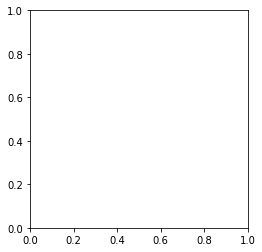

In [29]:
plt.imshow(seg1)

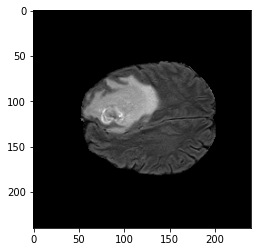

In [6]:
plt.imshow(a1[:,:,100].reshape(240,240,1), cmap='gray')

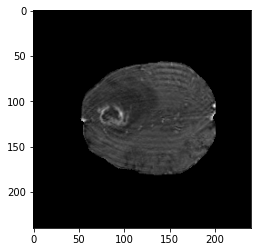

In [7]:
plt.imshow(a2[:,:,100].reshape(240,240,1), cmap='gray')

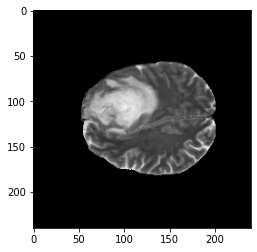

In [8]:
plt.imshow(a3[:,:,100].reshape(240,240,1), cmap='gray')

In [9]:
patients =  [i for i in os.listdir('../data/brats/MICCAI_BraTS2020_TrainingData/') if i.find('.')==-1]
len(patients)

369

# remove all npy files

In [10]:
import glob

for patient in patients:
    fileList = glob.glob(f'../data/brats/MICCAI_BraTS2020_TrainingData/{patient}/*.npy')

    for filePath in fileList:
        try:
            os.remove(filePath)
        except:
            print("Error while deleting file : ", filePath)

# Save dataset as numpy arrays

In [27]:
names = []
for patient in patients:
    records = [i for i in os.listdir('../data/brats/MICCAI_BraTS2020_TrainingData/'+patient) if i.find('npy')==-1]
    
    for record in records:
        img = nib.load('../data/brats/MICCAI_BraTS2020_TrainingData/'+patient+'/'+record)
        img = np.array(img.dataobj)
        
        #for i in range(img.shape[2]):
        for i in range(img.shape[2]):
            temp = img[:,:,i]
            temp = temp.reshape(temp.shape[0],temp.shape[1],1)
            
            name = '../data/brats/MICCAI_BraTS2020_TrainingData/'+patient+'/'+record
            name = name[:-7]
            name = '_'.join(name.split('_')[:-1])+f'_{i}_'+name.split('_')[-1]+'.npy'
            np.save(name,temp)
            print(temp.shape)
            
    

(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 240, 1)
(240, 

KeyboardInterrupt: 

In [33]:
from torch import nn

m = nn.LogSoftmax(dim=1)
loss = nn.NLLLoss()
# input is of size N x C = 3 x 5
input = torch.randn(3, 5, requires_grad=True)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 4])
output = loss(m(input), target)
output.backward()

NameError: name 'torch' is not defined